In [1]:
### Standard libraries

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
col_names = ['preg','plas','blood hg','skin', 'serum mu', 'mass', 'pedi', 'age', 'class']
dataset = pd.read_csv('pima-indians-diabetes.data.csv',names=col_names, delimiter=',', index_col = False)

In [3]:
dataset.shape

(768, 9)

In [4]:
dataset.head()

,preg,plas,blood hg,skin,serum mu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Some of the columns ( Skin, serum) having incorrect 0. Let's try to find columns having 0 values.

In [6]:
dataset.describe()

,preg,plas,blood hg,skin,serum mu,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Notice how the fields (preg, plas, blood hg, skin , serum and mass) have 0 values incorrectly. Let's try to analyze it with and without the 0 values.

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg        768 non-null int64
plas        768 non-null int64
blood hg    768 non-null int64
skin        768 non-null int64
serum mu    768 non-null int64
mass        768 non-null float64
pedi        768 non-null float64
age         768 non-null int64
class       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### columns (mass and pedi) are of type float and the rest are integer values

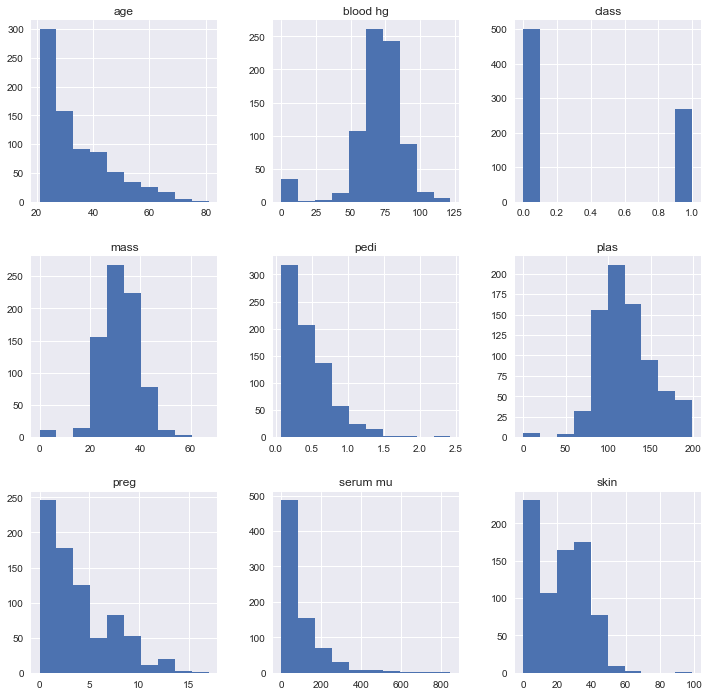

In [11]:
## Visualize using Histogram
dataset.hist(figsize = (12,12));

### Blood hg, mass and plas nearly have Gaussian distribution. 
### Age, Pedi, serum mu and Preg found to be exponentially distributed.

preg           Axes(0.125,0.657941;0.227941x0.222059)
plas        Axes(0.398529,0.657941;0.227941x0.222059)
blood hg    Axes(0.672059,0.657941;0.227941x0.222059)
skin           Axes(0.125,0.391471;0.227941x0.222059)
serum mu    Axes(0.398529,0.391471;0.227941x0.222059)
mass        Axes(0.672059,0.391471;0.227941x0.222059)
pedi              Axes(0.125,0.125;0.227941x0.222059)
age            Axes(0.398529,0.125;0.227941x0.222059)
class          Axes(0.672059,0.125;0.227941x0.222059)
dtype: object

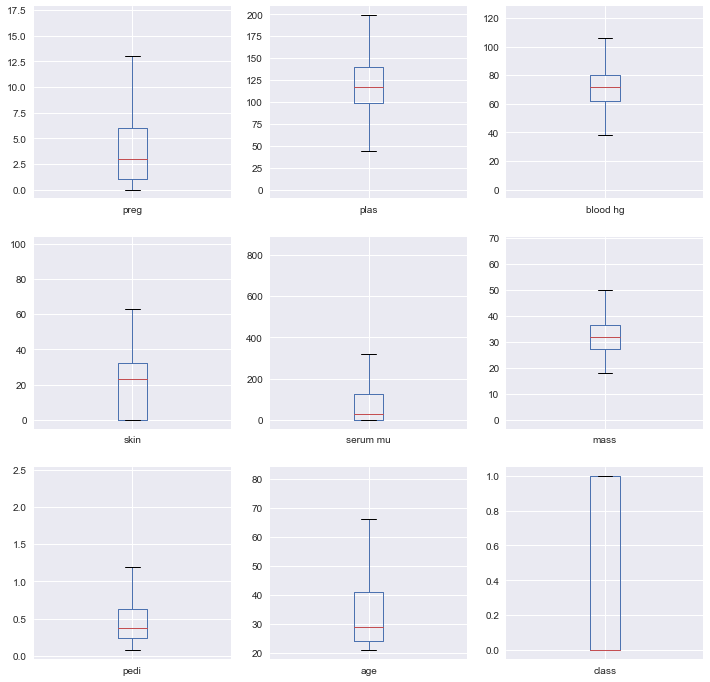

In [16]:
# Box plot
dataset.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(12,12))

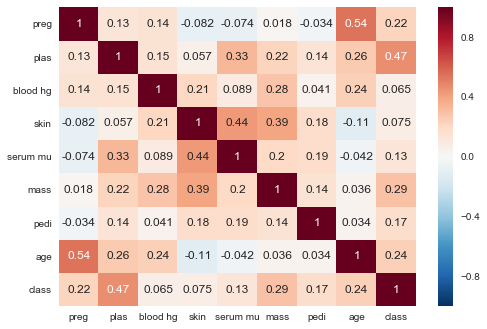

In [18]:
# Correlation plot
Corr=dataset[dataset.columns].corr() 
sns.heatmap(Corr, annot=True);

## Observed that attributes Blood hg, Skin are not much related to class(which is the target). 

### Note : Replaced 0 values by mean, but no performance improvement was observed while evaluating models. Dropped rows with 0 values, performance seems to be improved. But dataset reduces to half. Hence commented below lines.

In [19]:
# Data preprocessing - replace zeroes with mean or drop records with 0 values.
#attributes_to_replace_zero =list(dataset.columns[1:6])      # list all column names. 
#dataset[attributes_to_replace_zero] = dataset[attributes_to_replace_zero].replace(0, np.NaN)
#dataset.fillna(dataset.mean(), inplace=True) 
#dataset.dropna(inplace=True)

In [20]:
# Split into Input and Output.
attributes = list(dataset.columns[:8])
X = dataset[attributes].values 
y= dataset['class'].values

In [21]:
# Scale input dataset.
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler() 
X = sc_X.fit_transform(X) 

In [23]:
# Split into train and test sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state =0)

In [24]:
# Import suite of algorithms.
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.calibration import CalibratedClassifierCV

In [25]:
# Create objects of required models.
models = []
models.append(("LR",LogisticRegression()))
models.append(("GNB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(("LDA",  LinearDiscriminantAnalysis()))
models.append(("QDA",  QuadraticDiscriminantAnalysis()))
models.append(("AdaBoost", AdaBoostClassifier()))
models.append(("SVM Linear",SVC(kernel="linear")))
models.append(("SVM RBF",SVC(kernel="rbf")))
models.append(("Random Forest",  RandomForestClassifier()))
models.append(("Bagging",BaggingClassifier()))
models.append(("Calibrated",CalibratedClassifierCV()))
models.append(("GradientBoosting",GradientBoostingClassifier()))
models.append(("LinearSVC",LinearSVC()))
models.append(("Ridge",RidgeClassifier()))

In [26]:
# Find accuracy of models.
results = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=0)
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy")
    results.append(tuple([name,cv_result.mean(), cv_result.std()]))
  
results.sort(key=lambda x: x[1], reverse = True)    
for i in range(len(results)):
    print('{:20s} {:2.2f} (+/-) {:2.2f} '.format(results[i][0] , results[i][1] * 100, results[i][2] * 100))

SVM Linear           76.37 (+/-) 4.29 
Ridge                76.05 (+/-) 4.43 
Calibrated           75.73 (+/-) 4.56 
LR                   75.73 (+/-) 5.22 
LinearSVC            75.73 (+/-) 4.86 
SVM RBF              75.40 (+/-) 3.60 
LDA                  75.40 (+/-) 4.63 
Random Forest        74.58 (+/-) 5.48 
GradientBoosting     74.26 (+/-) 6.69 
GNB                  73.78 (+/-) 4.50 
KNN                  73.29 (+/-) 3.48 
Bagging              73.28 (+/-) 4.10 
QDA                  72.63 (+/-) 5.78 
AdaBoost             72.31 (+/-) 3.34 
DecisionTree         67.43 (+/-) 6.28 


## Since SVM came out to be the best model, I'm gonna optimize the performance.

In [27]:
from sklearn.model_selection import GridSearchCV
model = SVC()
paramaters = [
             {'C' : [0.01, 0.1, 1, 10, 100, 1000], 'kernel' : ['linear']}                                       
             ]
grid_search = GridSearchCV(estimator = model, 
                           param_grid = paramaters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_ 
best_parameters = grid_search.best_params_  

print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_  )

Best accuracy :  0.760586319218
Best parameters : {'C': 0.1, 'kernel': 'linear'}


### Model finalization

In [36]:
# Predict output for test set. 
final_model = SVC(C = 0.1, kernel = 'linear')
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(y_test, y_pred)
print("Confusion matrix: ")
print(cf)

Confusion matrix: 
[[98  9]
 [18 29]]


In [37]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred) * 100) 

Accuracy Score:  82.4675324675


In [38]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

             precision    recall  f1-score   support

          0       0.84      0.92      0.88       107
          1       0.76      0.62      0.68        47

avg / total       0.82      0.82      0.82       154



# Conclusion: Observed accuracy of 82.46% on test set using SVM linear model.